In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
device = torch.device("cpu")

### Defining netwroks with two linear layers. The network reads 3 parameters D_in, H, D_out, where H is the hidden dimension. The linear network works as two matrix multiplication. The first linear layer clamps output at 0 as RELU. The second linear layer output logits.

In [3]:
class TwoLayerNet(nn.Module):
    
    def __init__(self, D_in, H, D_out):    
        super(TwoLayerNet, self).__init__()
        
        self.linear1=nn.Linear(D_in, H)
        self.linear2=nn.Linear(H, D_out)
    
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        
        return y_pred

### Predefined parameters

In [4]:
# N=number of sample, D_in=Input dimensions, H=Hidden dimension, D_out=Number of classes
N, D_in, H, D_out = 50, 200, 100, 10
mus = range(D_out) # means
train_sigma = 0.4 # standard deviation
data_sigma = train_sigma
data_mus = np.arange(-0.5,9.5,0.01)

# Learning rate
lr=5e-4
# Number of optimization
num_ops=200000 # try 10000!

### Predefined data

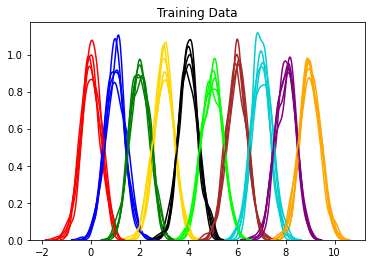

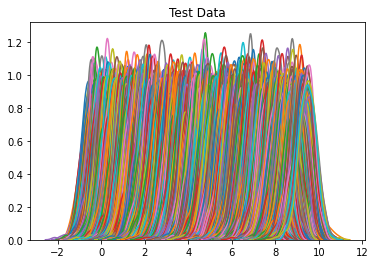

In [5]:
# Input data

X = torch.tensor(np.array([np.sort(np.random.normal(mus[i%D_out], train_sigma, D_in)) for i in range(N)]), dtype=torch.float32)
    
X_test = torch.tensor(np.array([np.sort(np.random.normal(data_mus[i], \
                                            data_sigma, D_in)) for i in range(len(data_mus))]), dtype=torch.float32)

y = torch.zeros(N, dtype=torch.long)
for i,x in enumerate(X):
    y[i] = round(float(torch.mean(x)))

colors = {0:'red', 1:'blue', 2:'green',3:'gold',4:'black',5:'lime',6:'brown',\
          7:'darkturquoise',8:'purple',9:'orange'}

for i, data in enumerate(X):
    sns.distplot(data, hist = False, color= colors[i%10])
plt.title('Training Data')
plt.show()
    
for x in X_test:
    sns.distplot(x, hist = False)
# plt.boxplot(X.tolist())
plt.title('Test Data')
plt.show()


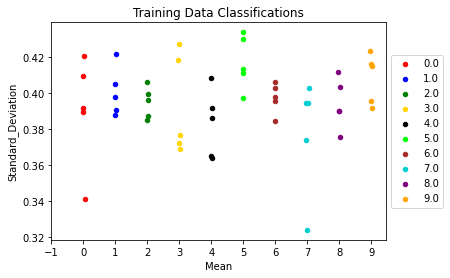

In [6]:
x_samples = []
for i,x in enumerate(X):
    x_i = [float(torch.mean(x)),float(torch.std(x)),y[i]]
    x_samples.append(x_i)

x_samples = np.array(x_samples)


df = pd.DataFrame(dict(Mean=x_samples[:,0], Standard_Deviation=x_samples[:,1], label=x_samples[:,2]))

colors = {0:'red', 1:'blue', 2:'green',3:'gold',4:'black',5:'lime',6:'brown',\
          7:'darkturquoise',8:'purple',9:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Mean', y='Standard_Deviation', label=key, color=colors[key])
plt.xticks(np.arange(-1,10,1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Training Data Classifications')
plt.show()

In [7]:
print(X.shape)
print(y.shape)
print(X_test.shape)

torch.Size([50, 200])
torch.Size([50])
torch.Size([1000, 200])


### Predefined functions

In [8]:
softmax=torch.nn.Softmax(dim=-1)

### Building model

In [9]:
model = TwoLayerNet(D_in, H, D_out)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

### Training

In [10]:
index = []
losses = []

for i in range(num_ops):
    Y=model(X)
    loss = loss_fn(Y,y)
    
    index.append(i)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
            


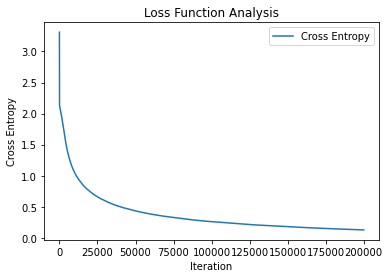

In [11]:
plt.plot(index,losses, label = 'Cross Entropy')
plt.title('Loss Function Analysis')
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy')
plt.legend()
plt.show()

# Output

### Checking performance of model

Text(0.5, 1.0, 'Distributions of Sample Classifications')

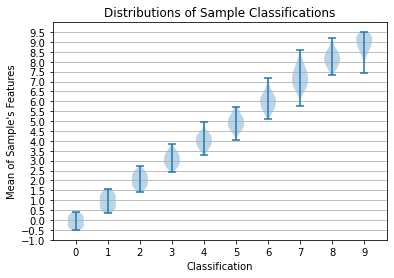

In [17]:
Y_test = list(map(lambda x: np.argmax(x), softmax(model(X_test)).detach().numpy()))

data = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for i in range(len(data_mus)):
    data[Y_test[i]].append(data_mus[i])
    
plt.violinplot(data.values(), positions = range(len(data.keys())))
plt.yticks(np.arange(-1,10,0.5))
plt.xticks(range(len(data.keys())))
plt.grid(axis='y')
plt.ylabel('Mean of Sample\'s Features')
plt.xlabel('Classification')
plt.title('Distributions of Sample Classifications')

In [18]:
samples = []
for i,x in enumerate(X_test):
    x_i = [float(torch.mean(x)),float(torch.std(x)),Y_test[i]]
    samples.append(x_i)

samples = np.array(samples)

df = pd.DataFrame(dict(Mean=samples[:,0], Standard_Deviation=samples[:,1], label=samples[:,2]))

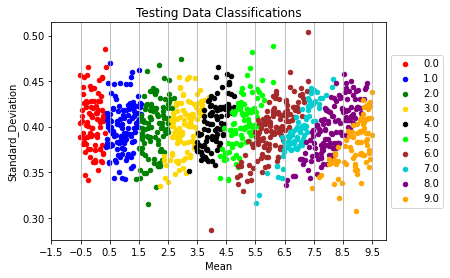

In [17]:
# colors = {0:'red', 1:'blue', 2:'green',3:'gold',4:'black',5:'lime',6:'brown',\
#          7:'darkturquoise',8:'purple',9:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Mean', y='Standard_Deviation', label=key, color=colors[key])
plt.xticks(np.arange(-1.5,10.5,1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Testing Data Classifications')
plt.grid(axis='x')
plt.show()